
Stock Price Prediction for 6 months



In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [44]:
#load data
dataset = yf.download('AAPL', start='2023-1-1', end='2023-6-1')


[*********************100%%**********************]  1 of 1 completed


In [45]:
#print data file

print(dataset)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.538666   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.823189   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.488876   
2023-01-06  126.010002  130.289993  124.889999  129.619995  129.069321   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.597061   
...                ...         ...         ...         ...         ...   
2023-05-24  171.089996  172.419998  170.520004  171.839996  171.608261   
2023-05-25  172.410004  173.899994  171.690002  172.990005  172.756714   
2023-05-26  173.320007  175.770004  173.110001  175.429993  175.193420   
2023-05-30  176.960007  178.990005  176.570007  177.300003  177.060898   
2023-05-31  177.330002  179.350006  176.759995  177.250000  177.010971   

               Volume  
Date         

In [46]:
# make independent variable
dataset['High-Low']=dataset['High']-dataset['Low']
dataset['Open-Close']=dataset['Open']-dataset['Close']


In [47]:
#store independent variables
x=dataset[['Open-Close','High-Low','Close']]

In [48]:
print(x)

            Open-Close  High-Low       Close
Date                                        
2023-01-03    5.209999  6.729996  125.070000
2023-01-04    0.529999  3.580002  126.360001
2023-01-05    2.110001  3.009995  125.019997
2023-01-06   -3.609993  5.399994  129.619995
2023-01-09    0.320007  3.520004  130.149994
...                ...       ...         ...
2023-05-24   -0.750000  1.899994  171.839996
2023-05-25   -0.580002  2.209991  172.990005
2023-05-26   -2.109985  2.660004  175.429993
2023-05-30   -0.339996  2.419998  177.300003
2023-05-31    0.080002  2.590012  177.250000

[103 rows x 3 columns]


In [49]:
#store target variable
y=np.where(dataset.Close.shift(-1) > dataset.Close , 1, 0)


In [50]:
print(y)

[1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0]


In [51]:
#persentage to split data
persentage_split=0.9
row=int(dataset.shape[0]*persentage_split)

#train
x_train=x[:row]
y_train=y[:row]

#test
x_test=x[row:]
y_test=y[row:]

In [52]:
print(x)

            Open-Close  High-Low       Close
Date                                        
2023-01-03    5.209999  6.729996  125.070000
2023-01-04    0.529999  3.580002  126.360001
2023-01-05    2.110001  3.009995  125.019997
2023-01-06   -3.609993  5.399994  129.619995
2023-01-09    0.320007  3.520004  130.149994
...                ...       ...         ...
2023-05-24   -0.750000  1.899994  171.839996
2023-05-25   -0.580002  2.209991  172.990005
2023-05-26   -2.109985  2.660004  175.429993
2023-05-30   -0.339996  2.419998  177.300003
2023-05-31    0.080002  2.590012  177.250000

[103 rows x 3 columns]


In [53]:
print(x_train)


            Open-Close  High-Low       Close
Date                                        
2023-01-03    5.209999  6.729996  125.070000
2023-01-04    0.529999  3.580002  126.360001
2023-01-05    2.110001  3.009995  125.019997
2023-01-06   -3.609993  5.399994  129.619995
2023-01-09    0.320007  3.520004  130.149994
...                ...       ...         ...
2023-05-09    1.279999  1.939987  171.770004
2023-05-10   -0.539993  2.130005  173.559998
2023-05-11    0.100006  2.419998  173.750000
2023-05-12    1.049988  3.059998  172.570007
2023-05-15    1.089996  1.740005  172.070007

[92 rows x 3 columns]


In [54]:
print(x_test)


            Open-Close  High-Low       Close
Date                                        
2023-05-16   -0.080002  1.339996  172.070007
2023-05-17   -0.979996  2.509995  172.690002
2023-05-18   -2.050003  2.660004  175.050003
2023-05-19    1.229996  1.449997  175.160004
2023-05-22   -0.220001  1.260010  174.199997
2023-05-23    1.570007  2.100006  171.559998
2023-05-24   -0.750000  1.899994  171.839996
2023-05-25   -0.580002  2.209991  172.990005
2023-05-26   -2.109985  2.660004  175.429993
2023-05-30   -0.339996  2.419998  177.300003
2023-05-31    0.080002  2.590012  177.250000


In [ ]:
#build our model

!pip install sklearn
from sklearn.svm import SVC
model=SVC()
model.fit(x_train[['Open-Close','High-Low']], y_train)

In [56]:
# score train
model.score(x_train[['Open-Close','High-Low']], y_train)

0.5652173913043478

In [57]:
#score test
model.score(x_test[['Open-Close','High-Low']], y_test)

0.6363636363636364

In [58]:
# prediction
dataset['predictions']=model.predict(x[['Open-Close','High-Low']])
print(dataset['predictions'])

Date
2023-01-03    1
2023-01-04    1
2023-01-05    1
2023-01-06    1
2023-01-09    1
             ..
2023-05-24    1
2023-05-25    1
2023-05-26    1
2023-05-30    1
2023-05-31    1
Name: predictions, Length: 103, dtype: int64


In [59]:
#todays inputs
dataset['In']=dataset['Close'].pct_change(1)
print(dataset['In'])

Date
2023-01-03         NaN
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
                ...   
2023-05-24    0.001632
2023-05-25    0.006692
2023-05-26    0.014105
2023-05-30    0.010660
2023-05-31   -0.000282
Name: In, Length: 103, dtype: float64


In [60]:
#future inputs
dataset['Future']=dataset['predictions'].shift(1)*dataset['In']
print(dataset['Future'])

Date
2023-01-03         NaN
2023-01-04    0.010314
2023-01-05   -0.010605
2023-01-06    0.036794
2023-01-09    0.004089
                ...   
2023-05-24    0.001632
2023-05-25    0.006692
2023-05-26    0.014105
2023-05-30    0.010660
2023-05-31   -0.000282
Name: Future, Length: 103, dtype: float64


In [61]:
# sum today
dataset['sum_In_data']=dataset['In'].cumsum()
# sum future
dataset['sum_Future_data']=dataset['Future'].cumsum()


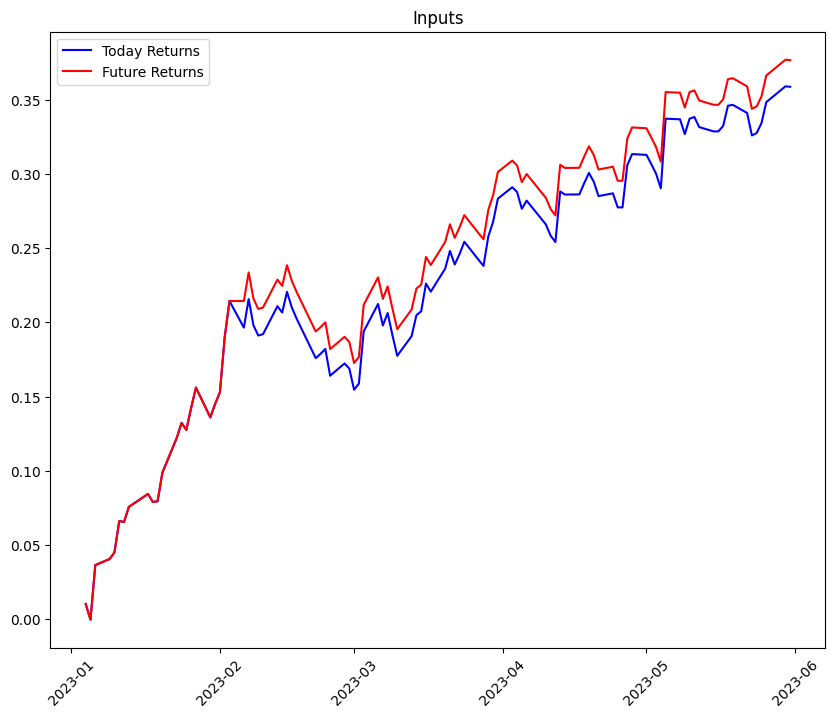

In [62]:
#plotting
plt.figure(figsize=(10,8))
plt.title('Inputs')
plt.plot(dataset['sum_In_data'],color='blue',label='Today Returns')
plt.plot(dataset['sum_Future_data'],color='red',label='Future Returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()